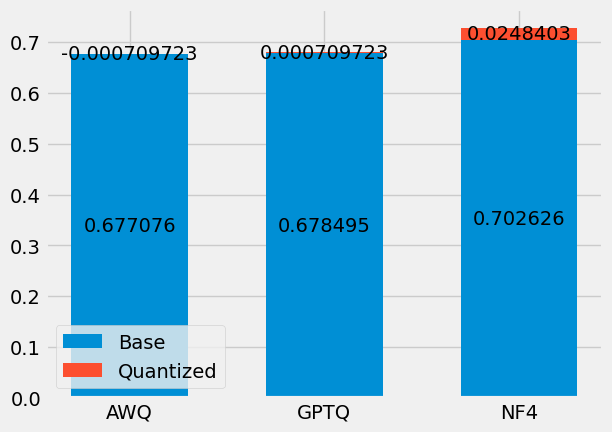

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

methods = ['AWQ', 'GPTQ', 'NF4']
correct_awq = 954
correct_gptq = 956
correct_nf4 = 990
correct_base = 955

num_questions = 1409

acc_awq = correct_awq / num_questions
acc_gptq = correct_gptq / num_questions
acc_nf4 = correct_nf4 / num_questions
acc_base = correct_base / num_questions

base = np.array([acc_base, acc_base, acc_base])
quantized = np.array([acc_awq, acc_gptq, acc_nf4])
results = {
    'Base': quantized,
    'Quantized': quantized - base,
    
}
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(3)

for method, model in results.items():
    p = ax.bar(methods, model, width, label=method, bottom=bottom)
    bottom += model
    ax.bar_label(p, label_type='center')

plt.legend()
plt.show()

In [20]:
fig.savefig('results-zeroshot-prompt1.png')

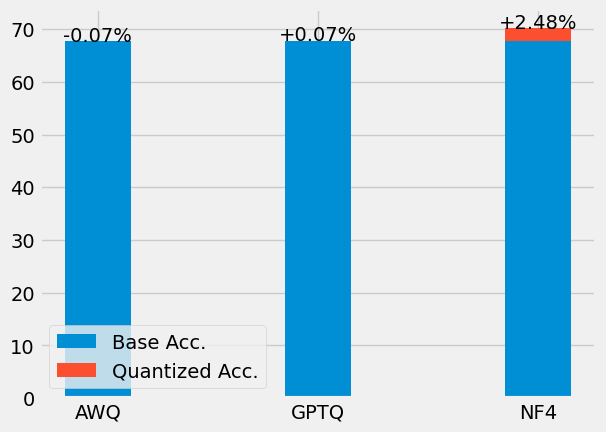

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

methods = ['AWQ', 'GPTQ', 'NF4']
base = np.array([955,955,955])
vals = np.array([954, 956, 990])

num_questions = 1409

vals = vals / num_questions * 100
base = base / num_questions * 100

fig, ax = plt.subplots()

ax.bar(methods, base, 0.3, label='Base Acc.')
ax.bar(methods, vals - base, 0.3, bottom=base, label='Quantized Acc.')
ax.legend()

for i in range(len(methods)):
    if vals[i] - base[i] >= 0:
        plt.text(i, vals[i], f"+{vals[i]-base[i]:.2f}%", ha = 'center')
    else:
        plt.text(i, vals[i], f"{vals[i]-base[i]:.2f}%", ha = 'center')

plt.show()